In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [571]:
np.random.seed(111)
x = np.random.uniform(-1, 1, 20)
y = np.random.uniform(-1, 1, 20)

In [572]:
limx = 1.4
limy = 1.4

(-1.4, 1.4)

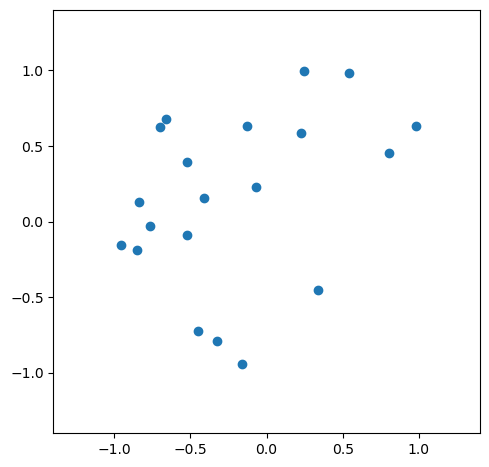

In [573]:
plt.figure(figsize=(5.5,5.5))
plt.plot(x, y, 'o')
plt.xlim([-limx,limx])
plt.ylim([-limy,limy])

In [574]:
random_index = np.random.randint(0, 20)
random_index

4

In [589]:

x0 = x[random_index]
y0 = y[random_index]

list_dist = np.sqrt((x - x0)**2 + (y - y0)**2)
indice_mais_longe1 = np.argmax(list_dist)
x1 = x[indice_mais_longe1]
y1 = y[indice_mais_longe1]

list_dist2 = np.sqrt((x - x1)**2 + (y - y1)**2)
indice_mais_longe2 = np.argmax(list_dist2)
x2 = x[indice_mais_longe2]
y2 = y[indice_mais_longe2]

a = (y2-y1)/(x2-x1)
b = (y1 + y2 - a*(x1 + x2))/2

reta_x = np.array([-1.2, 1.2])
reta_y = reta_x*a + b

array([[-0.211586  ],
       [ 0.15642682]])

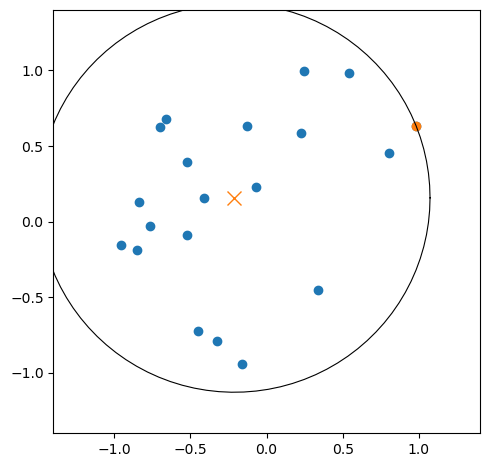

In [590]:
mean0 = np.array([[np.mean(x)],[np.mean(y)]])
dists = np.sqrt((mean0[0,0] - x)**2 + (mean0[1,0] - y)**2)
farthest0x = x[np.argmax(dists)]
farthest0y = y[np.argmax(dists)]
max_dist = dists[np.argmax(dists)]

phis = np.linspace(0, 2*np.pi, 100)
ball0x = max_dist*np.cos(phis) + mean0[0]
ball0y = max_dist*np.sin(phis) + mean0[1]


plt.figure(figsize=(5.5,5.5))
plt.plot(x, y, 'o')
#plt.plot(reta_x, reta_y, 'k-')
plt.plot(farthest0x, farthest0y, 'o', color='tab:orange')
plt.plot(mean0[0], mean0[1], 'x', color='tab:orange', markersize=10)
plt.plot(ball0x, ball0y, color='black', linewidth=0.8)

plt.xlim([-limx,limx])
plt.ylim([-limy,limy])
mean0

(-1.4, 1.4)

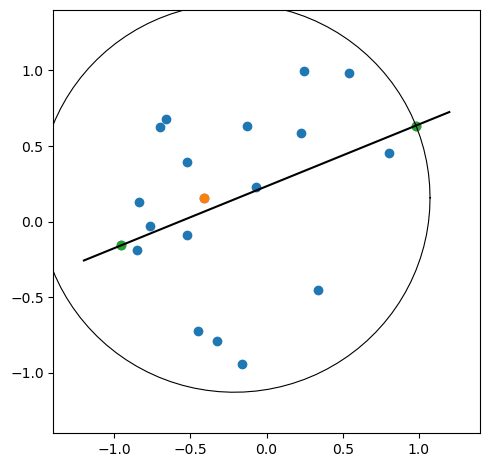

In [592]:
plt.figure(figsize=[5.5, 5.5])
plt.plot(x, y, 'o')
plt.plot(x0, y0, 'o')
plt.plot(x1, y1, 'o', color='tab:green')
plt.plot(x2, y2, 'o', color='tab:green')
plt.plot(reta_x, reta_y, 'k-')
plt.plot(ball0x, ball0y, color='black', linewidth=0.8)
plt.xlim([-limx,limx])
plt.ylim([-limy,limy])

(-1.4, 1.4)

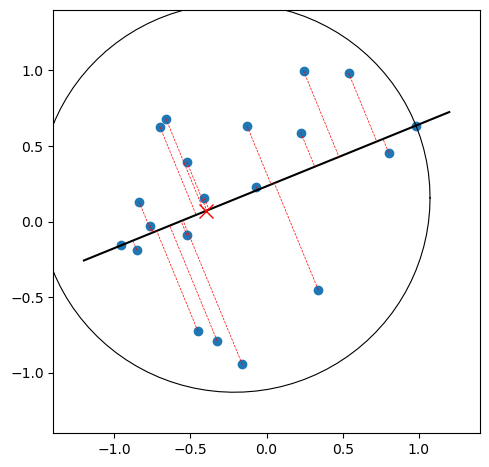

In [594]:
a = (y2-y1)/(x2-x1)
b = (y1 + y2 - a*(x1 + x2))/2

reta_x = np.array([-1.2, 1.2])
reta_y = reta_x*a + b

v = np.array([[1], [a]])
v = v/np.linalg.norm(v)

points_matrix = np.array([x,y - b]).T

list_proj = points_matrix @ v

proj_vecs = list_proj[:,0]*v
list_p = proj_vecs + np.array([[0],[b]])
median_p = np.array([np.median(proj_vecs[0]), np.median(proj_vecs[1])]) + np.array([0, b])

plt.figure(figsize=(5.5,5.5))
plt.plot(x, y, 'o')
plt.plot(reta_x, reta_y, 'k-')
plt.plot(median_p[0], median_p[1], 'rx', markersize=10)
plt.plot(ball0x, ball0y, color='black', linewidth=0.8)

for k, proj in enumerate(list_proj):
    if k != indice_mais_longe1 and k != indice_mais_longe2:
        plt.plot([x[k], list_p[0,k]], [y[k], list_p[1,k]], 'r--', linewidth=0.5)

plt.xlim([-limx,limx])
plt.ylim([-limy,limy])

(-1.4, 1.4)

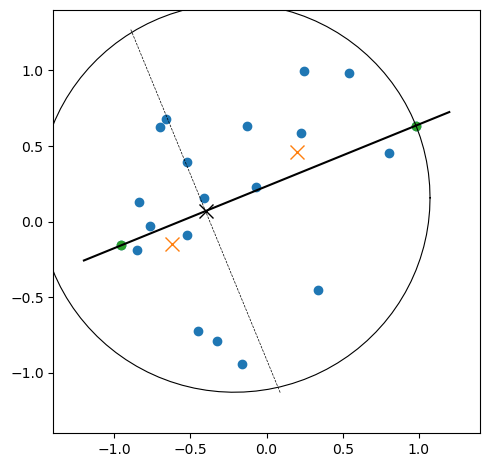

In [595]:
part1 = []
part2 = []
for i in range(20):
    if list_p[0,i] < median_p[0]:
        part1.append(np.array([x[i], y[i]]))
    else:
        part2.append(np.array([x[i], y[i]]))

part1 = np.array(part1)
part2 = np.array(part2)

mean1 = np.reshape(np.mean(np.array(part1), axis=0), [1, 2])
mean2 = np.reshape(np.mean(np.array(part2), axis=0), [1, 2])

ort_vec1 = 1.2*np.array([-a, 1]) + median_p
ort_vec2 = -1.2*np.array([-a,1]) + median_p

plt.figure(figsize=(5.5,5.5))
plt.plot(x, y, 'o')
plt.plot(x1, y1, 'o', color='tab:green')
plt.plot(x2, y2, 'o', color='tab:green')
plt.plot(reta_x, reta_y, 'k-')
plt.plot(median_p[0], median_p[1], 'kx', markersize=10)
plt.plot(mean1[0,0], mean1[0,1], 'x', color='tab:orange', markersize=10)
plt.plot(mean2[0,0], mean2[0,1], 'x', color='tab:orange', markersize=10)
plt.plot([ort_vec2[0], ort_vec1[0]], [ort_vec2[1], ort_vec1[1]], 'k--', linewidth=0.5)
plt.plot(ball0x, ball0y, color='black', linewidth=0.8)

plt.xlim([-limx,limx])
plt.ylim([-limy,limy])

(-1.4, 1.4)

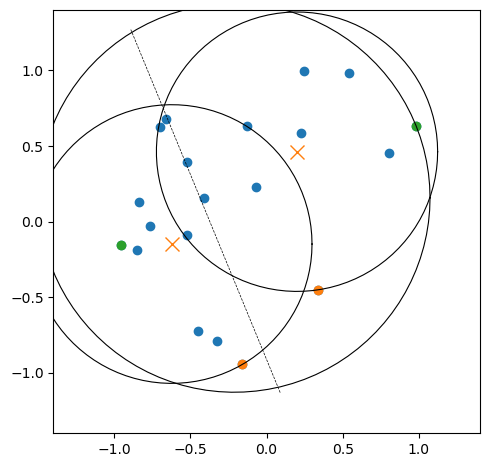

In [596]:
index_farthest1 = np.argmax(np.sqrt(np.sum((part1 - mean1)**2, axis=1)))
index_farthest2 = np.argmax(np.sqrt(np.sum((part2 - mean2)**2, axis=1)))
farthest1 = part1[index_farthest1]
farthest2 = part2[index_farthest2]

phis = np.linspace(0, 2*np.pi, 100)
R1 = np.linalg.norm(mean1 - farthest1)
R2 = np.linalg.norm(mean2 - farthest2)
ball1 = np.array([R1*np.cos(phis) + mean1[0,0], R1*np.sin(phis) + mean1[0,1]]).T
ball2 = np.array([R2*np.cos(phis) + mean2[0,0], R2*np.sin(phis) + mean2[0,1]]).T

plt.figure(figsize=(5.5,5.5))
plt.plot(x, y, 'o')
plt.plot(x1, y1, 'o', color='tab:green')
plt.plot(x2, y2, 'o', color='tab:green')
#plt.plot(median_p[0], median_p[1], 'kx', markersize=10)
plt.plot(mean1[0,0], mean1[0,1], 'x', color='tab:orange', markersize=10)
plt.plot(mean2[0,0], mean2[0,1], 'x', color='tab:orange', markersize=10)
plt.plot([ort_vec2[0], ort_vec1[0]], [ort_vec2[1], ort_vec1[1]], 'k--', linewidth=0.5)
plt.plot([farthest1[0], farthest2[0]], [farthest1[1], farthest2[1]], 'o', color='tab:orange')
plt.plot(ball1[:, 0], ball1[:, 1], color='black', linewidth=0.8)
plt.plot(ball2[:, 0], ball2[:, 1], color='black', linewidth=0.8)
plt.plot(ball0x, ball0y, color='black', linewidth=0.8)

plt.xlim([-limx,limx])
plt.ylim([-limy,limy])

In [534]:
mean1

array([[-0.19839143,  0.35755303]])